#Zadanie 1

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Two gangs

Dataset:

In [19]:
[0]*10+[1]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [20]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000)
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2)
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))
labels

array([0., 0., 0., ..., 1., 1., 1.])

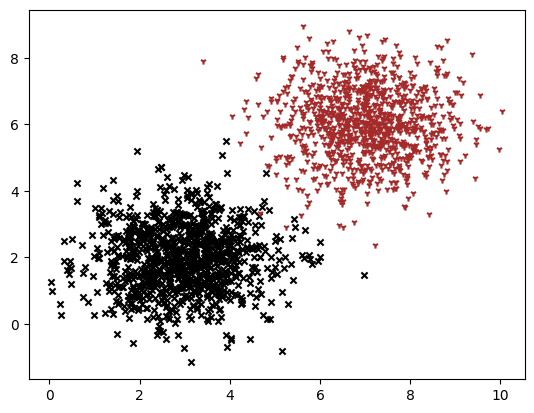

In [21]:
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='brown', marker='1', s=20)
plt.show()

In [22]:
x_label1

array([2.30614327, 0.75297111, 2.8585387 , 3.96724812, 3.16015392,
       2.28728923, 3.12491206, 0.85038794, 5.0091307 , 4.48916892,
       5.29939297, 3.82657403, 3.4928785 , 4.16587095, 3.69696734,
       3.21341876, 3.56375741, 3.8275586 , 4.55081669, 1.6215631 ,
       2.08780684, 2.10557355, 3.41806592, 0.23598261, 3.75306715,
       2.64934141, 1.75374851, 5.10033485, 3.46537647, 5.64292045,
       3.59596295, 2.67828671, 3.45321583, 2.57749006, 3.26460318,
       1.49631297, 4.69685886, 2.12373768, 1.28148686, 2.33306141,
       2.26242173, 2.96515406, 3.93740405, 4.23330002, 3.06535583,
       3.33076952, 3.1698234 , 4.20925318, 3.13250041, 3.5186124 ,
       2.78338648, 3.01688938, 1.05636102, 3.45158359, 1.76667054,
       4.06606696, 1.43359462, 1.90906086, 2.45369586, 2.71553701,
       1.77232522, 4.67399631, 1.81325732, 1.78967711, 2.8858591 ,
       1.40227297, 1.40333261, 3.11356153, 3.51172758, 2.91847805,
       4.88696209, 4.65160923, 3.4725357 , 3.71172466, 3.35641

In [23]:
def loss_fn_grad(y, y_model):
 return tf.reduce_mean(-y*tf.math.log(y_model)-(1-y)*tf.math.log(1-y_model))

In [24]:
def subset_dataset(x_dataset, y_dataset,label,subset_size):
    arr = np.arange(len(x_dataset))
    np.random.shuffle(arr)
    x_train = x_dataset[arr[0:subset_size]]
    y_train = y_dataset[arr[0:subset_size]]
    label_train = label[arr[0:subset_size]]
    return x_train,y_train,label_train

In [25]:
labels.shape

(2000,)

In [26]:
Loss = []
epochs = 1000
learning_rate = 0.01
batch_size = 50
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
for _ in range(epochs):
  xs_batch,ys_batch,labels_batch = subset_dataset(xs,ys,labels,batch_size)
  with tf.GradientTape() as tape:
    pred_l = tf.sigmoid(a * xs_batch + b * ys_batch + c)
    #print(label_batch.shape)
    loss = loss_fn_grad(labels_batch, pred_l)
    Loss.append(loss.numpy())

  dloss_da, dloss_db, dloss_dc = tape.gradient(loss,(a, b,c))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db
  c.assign_sub(learning_rate*dloss_dc)

In [27]:
np.max(Loss),np.min(Loss)

(1.521387, 0.30620345)

In [28]:
print(a.numpy())
print(b.numpy())

-0.03411645
0.53702235


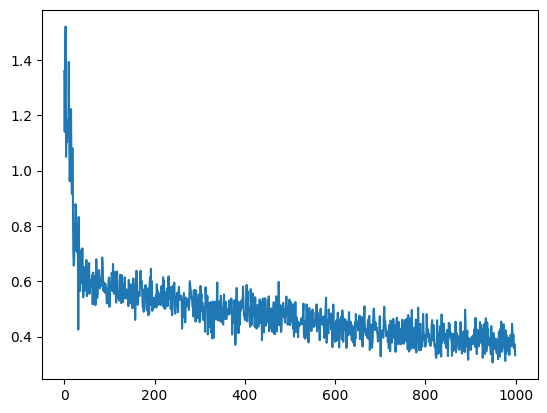

In [29]:
plt.plot(Loss)
plt.show()

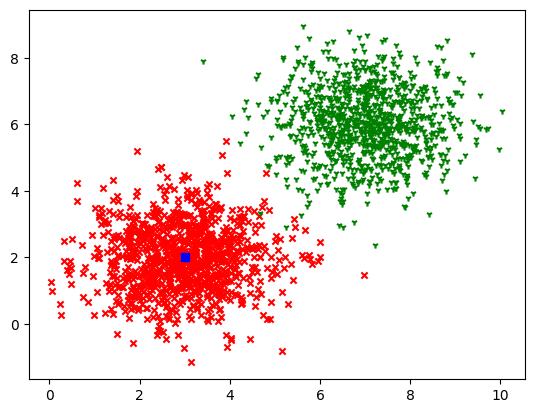

In [30]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

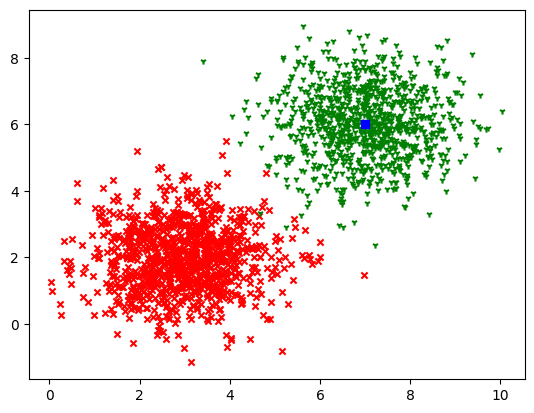

In [31]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

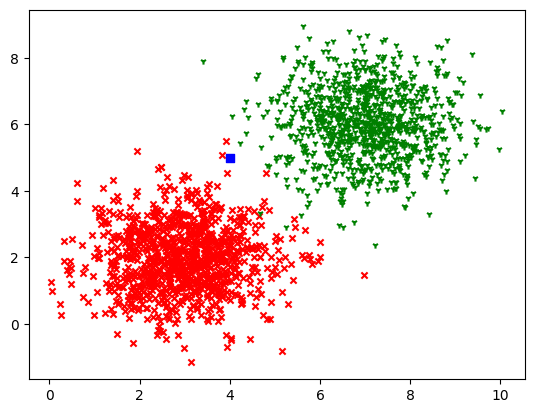

In [32]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Hiperparametria

##Learning rate 0.1

In [33]:
Loss = []
epochs = 1000
learning_rate = 0.1
batch_size = 50
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
for _ in range(epochs):
  xs_batch,ys_batch,labels_batch = subset_dataset(xs,ys,labels,batch_size)
  with tf.GradientTape() as tape:
    pred_l = tf.sigmoid(a * xs_batch + b * ys_batch + c)
    #print(label_batch.shape)
    loss = loss_fn_grad(labels_batch, pred_l)
    Loss.append(loss.numpy())

  dloss_da, dloss_db, dloss_dc = tape.gradient(loss,(a, b,c))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db
  c.assign_sub(learning_rate*dloss_dc)

In [34]:
np.max(Loss),np.min(Loss)

(1.5082442, 0.058400158)

In [35]:
print(a.numpy())
print(b.numpy())

0.5717125
0.87403923


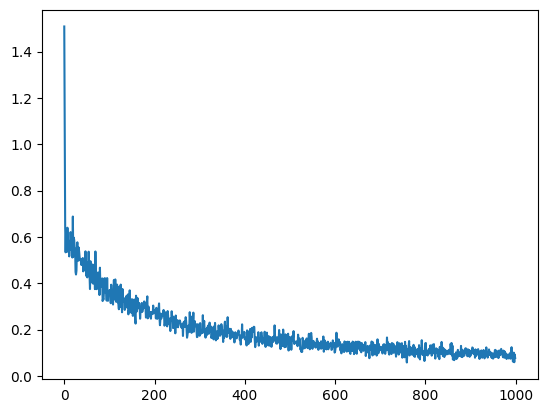

In [36]:
plt.plot(Loss)
plt.show()

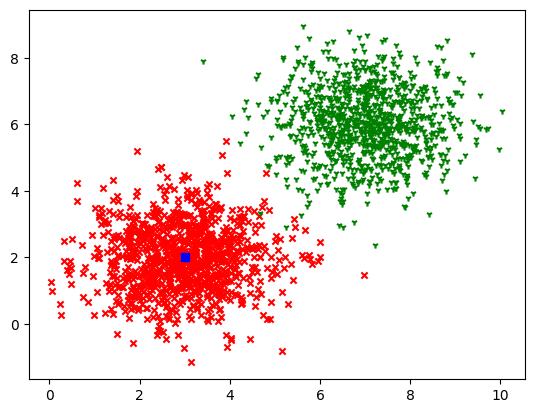

In [37]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

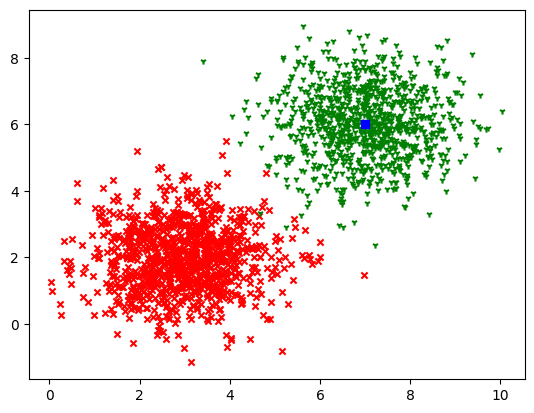

In [38]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

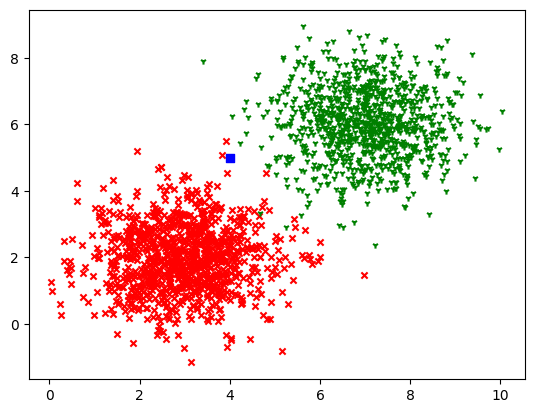

In [39]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

Learning rate 0.001

In [40]:
Loss = []
epochs = 1000
learning_rate = 0.001
batch_size = 50
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
for _ in range(epochs):
  xs_batch,ys_batch,labels_batch = subset_dataset(xs,ys,labels,batch_size)
  with tf.GradientTape() as tape:
    pred_l = tf.sigmoid(a * xs_batch + b * ys_batch + c)
    #print(label_batch.shape)
    loss = loss_fn_grad(labels_batch, pred_l)
    Loss.append(loss.numpy())

  dloss_da, dloss_db, dloss_dc = tape.gradient(loss,(a, b,c))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db
  c.assign_sub(learning_rate*dloss_dc)

In [41]:
np.max(Loss),np.min(Loss)

(3.0714028, 0.44047368)

In [42]:
print(a.numpy())
print(b.numpy())

-0.03317762
0.2501896


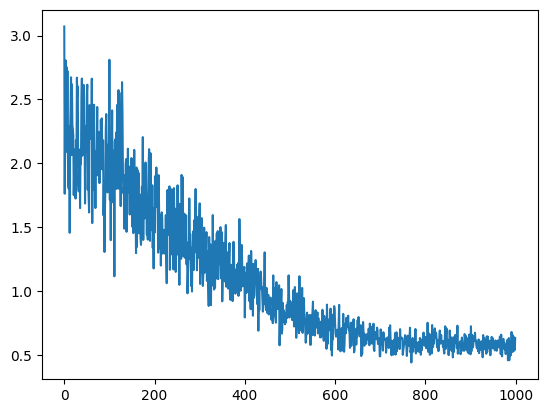

In [43]:
plt.plot(Loss)
plt.show()

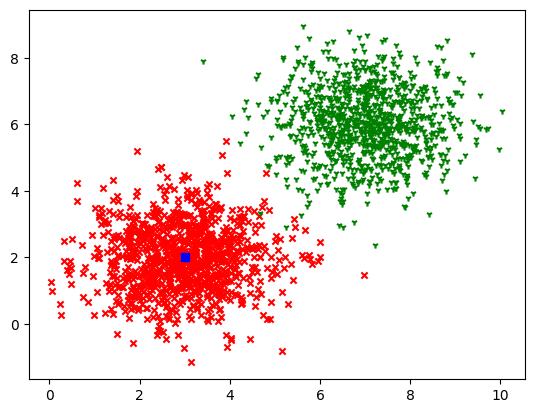

In [44]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

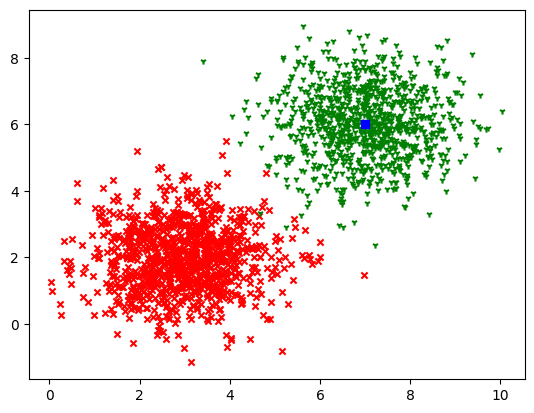

In [45]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

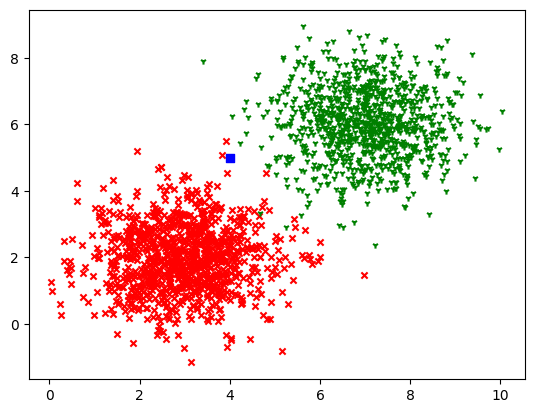

In [46]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Number of epchos - 100

In [47]:
Loss = []
epochs = 100
learning_rate = 0.01
batch_size = 50
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
for _ in range(epochs):
  xs_batch,ys_batch,labels_batch = subset_dataset(xs,ys,labels,batch_size)
  with tf.GradientTape() as tape:
    pred_l = tf.sigmoid(a * xs_batch + b * ys_batch + c)
    #print(label_batch.shape)
    loss = loss_fn_grad(labels_batch, pred_l)
    Loss.append(loss.numpy())

  dloss_da, dloss_db, dloss_dc = tape.gradient(loss,(a, b,c))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db
  c.assign_sub(learning_rate*dloss_dc)

In [48]:
np.max(Loss),np.min(Loss)

(2.610952, 0.49552184)

In [49]:
print(a.numpy())
print(b.numpy())

0.097366445
0.11506871


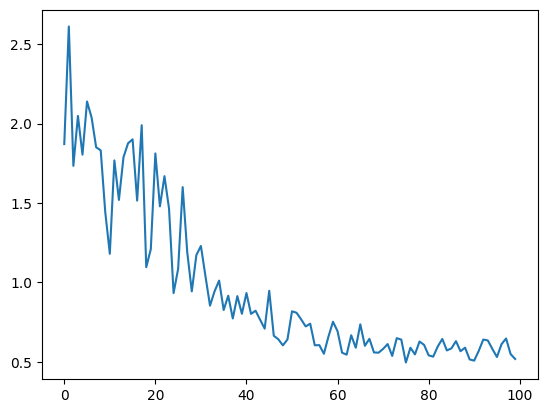

In [50]:
plt.plot(Loss)
plt.show()

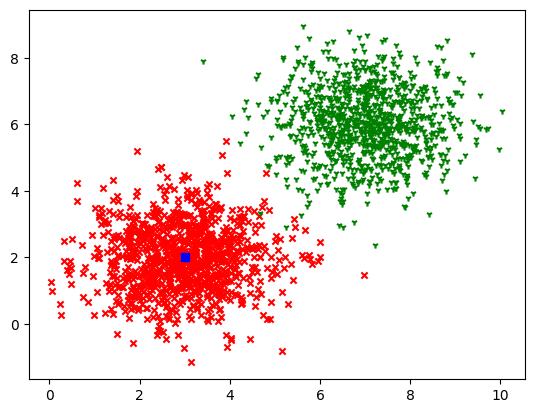

In [51]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

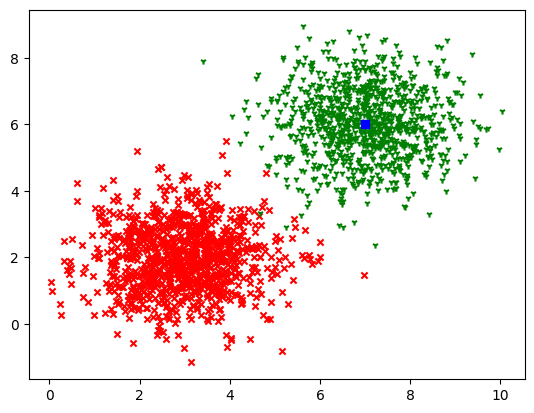

In [52]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

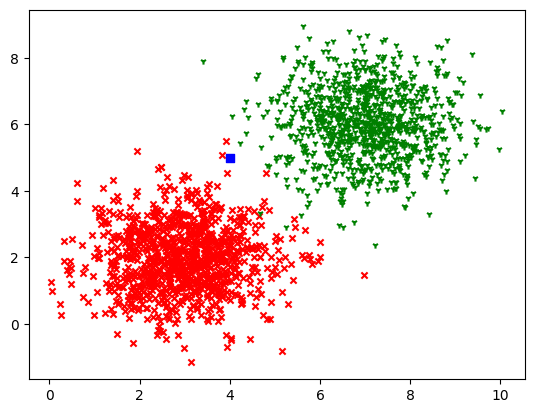

In [53]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Number of epochs - 3000

In [54]:
Loss = []
epochs = 3000
learning_rate = 0.01
batch_size = 50
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
for _ in range(epochs):
  xs_batch,ys_batch,labels_batch = subset_dataset(xs,ys,labels,batch_size)
  with tf.GradientTape() as tape:
    pred_l = tf.sigmoid(a * xs_batch + b * ys_batch + c)
    #print(label_batch.shape)
    loss = loss_fn_grad(labels_batch, pred_l)
    Loss.append(loss.numpy())

  dloss_da, dloss_db, dloss_dc = tape.gradient(loss,(a, b,c))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db
  c.assign_sub(learning_rate*dloss_dc)

In [55]:
np.max(Loss),np.min(Loss)

(0.8797482, 0.14934888)

In [56]:
print(a.numpy())
print(b.numpy())

0.15790226
0.6693555


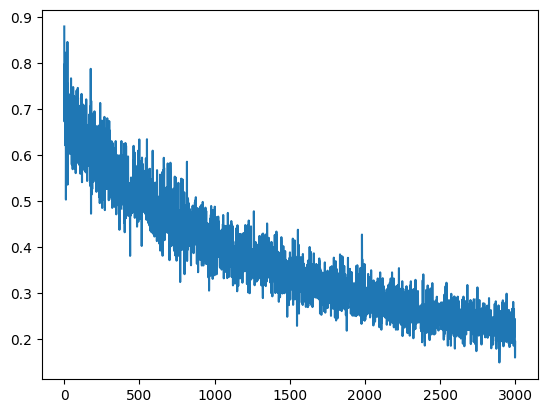

In [57]:
plt.plot(Loss)
plt.show()

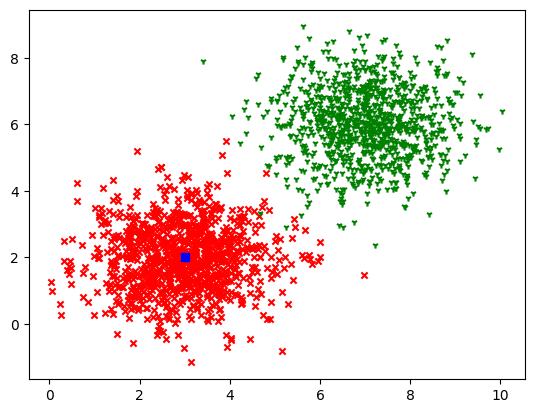

In [58]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

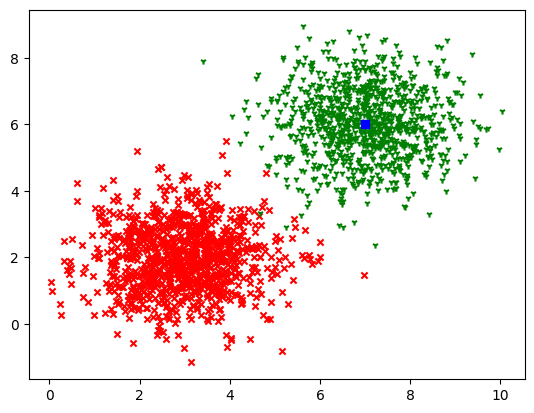

In [59]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

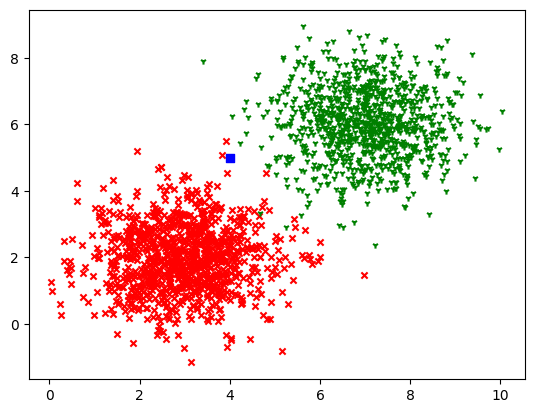

In [60]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Minibatch

In [61]:
Loss = []
epochs = 1000
learning_rate = 0.01
batch_size = 50
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
for _ in range(epochs):
  xs_batch,ys_batch,labels_batch = subset_dataset(xs,ys,labels,batch_size)
  with tf.GradientTape() as tape:
    pred_l = tf.sigmoid(a * xs_batch + b * ys_batch + c)
    #print(label_batch.shape)
    loss = loss_fn_grad(labels_batch, pred_l)
    Loss.append(loss.numpy())

  dloss_da, dloss_db, dloss_dc = tape.gradient(loss,(a, b,c))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db
  c.assign_sub(learning_rate*dloss_dc)

In [62]:
np.max(Loss),np.min(Loss)

(1.4217163, 0.2871933)

In [63]:
print(a.numpy())
print(b.numpy())

-0.112810634
0.5943694


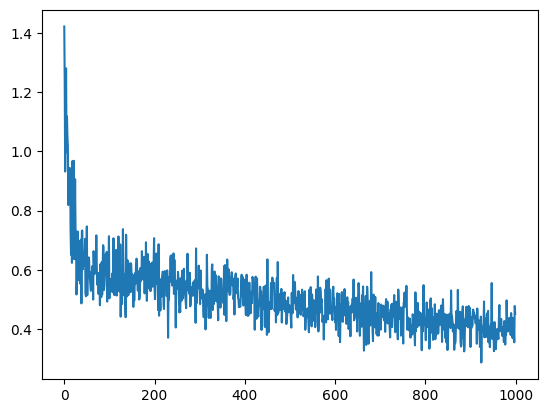

In [64]:
plt.plot(Loss)
plt.show()

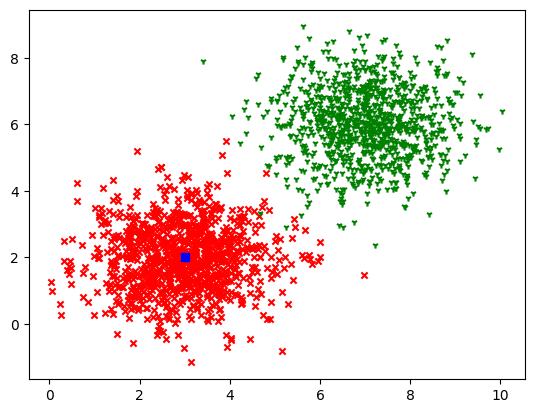

In [65]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

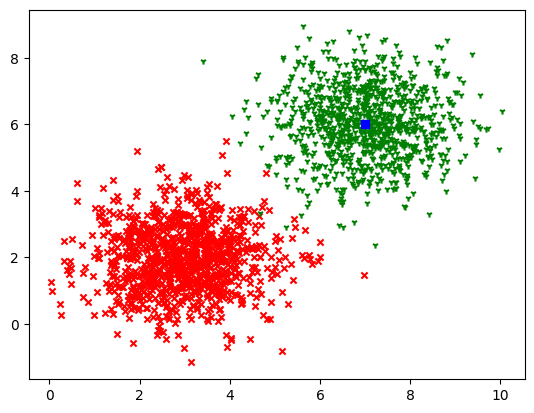

In [66]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

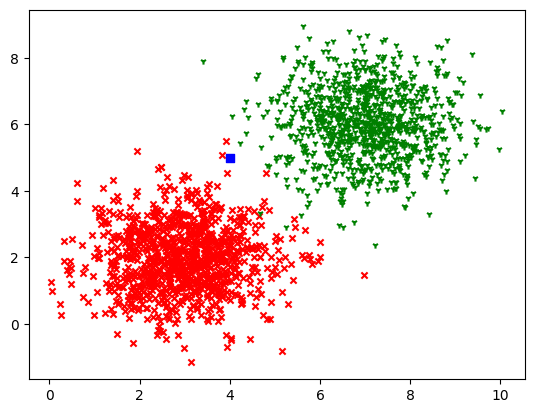

In [67]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Batch size - 20

In [68]:
Loss = []
epochs = 1000
learning_rate = 0.01
batch_size = 20
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
for _ in range(epochs):
  xs_batch,ys_batch,labels_batch = subset_dataset(xs,ys,labels,batch_size)
  with tf.GradientTape() as tape:
    pred_l = tf.sigmoid(a * xs_batch + b * ys_batch + c)
    #print(label_batch.shape)
    loss = loss_fn_grad(labels_batch, pred_l)
    Loss.append(loss.numpy())

  dloss_da, dloss_db, dloss_dc = tape.gradient(loss,(a, b,c))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db
  c.assign_sub(learning_rate*dloss_dc)

In [69]:
np.max(Loss),np.min(Loss)

(1.0369635, 0.23119922)

In [70]:
print(a.numpy())
print(b.numpy())

-0.025181422
0.518855


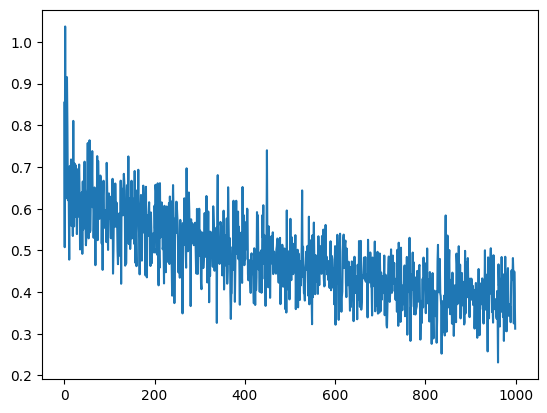

In [71]:
plt.plot(Loss)
plt.show()

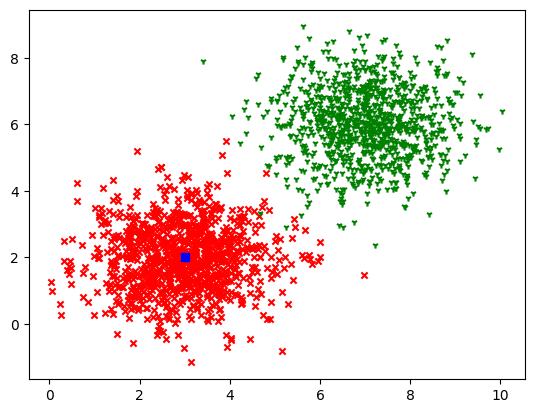

In [72]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

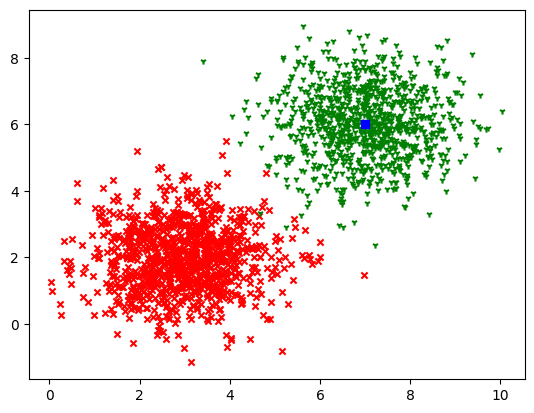

In [73]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

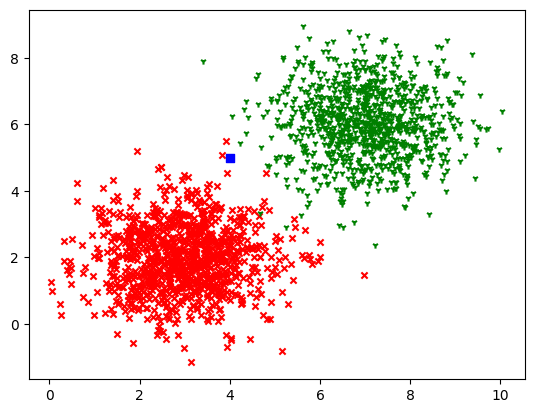

In [74]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Batch size - 100

In [75]:
Loss = []
epochs = 1000
learning_rate = 0.01
batch_size = 100
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
for _ in range(epochs):
  xs_batch,ys_batch,labels_batch = subset_dataset(xs,ys,labels,batch_size)
  with tf.GradientTape() as tape:
    pred_l = tf.sigmoid(a * xs_batch + b * ys_batch + c)
    #print(label_batch.shape)
    loss = loss_fn_grad(labels_batch, pred_l)
    Loss.append(loss.numpy())

  dloss_da, dloss_db, dloss_dc = tape.gradient(loss,(a, b,c))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db
  c.assign_sub(learning_rate*dloss_dc)

In [76]:
np.max(Loss),np.min(Loss)

(1.600503, 0.3014175)

In [77]:
print(a.numpy())
print(b.numpy())

-0.09112978
0.61334753


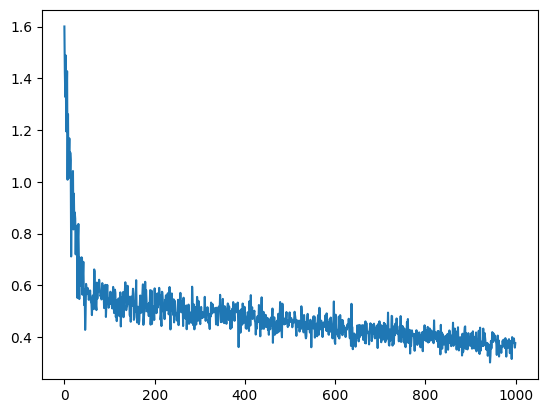

In [78]:
plt.plot(Loss)
plt.show()

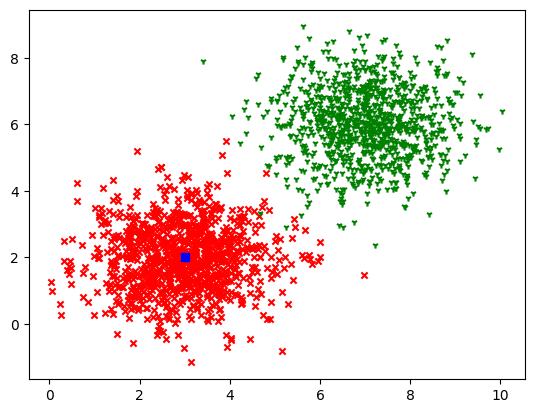

In [79]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

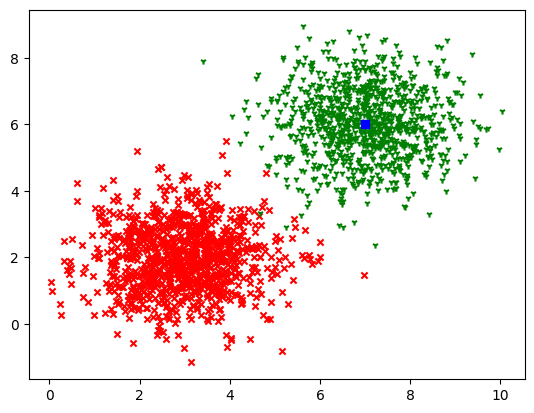

In [80]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

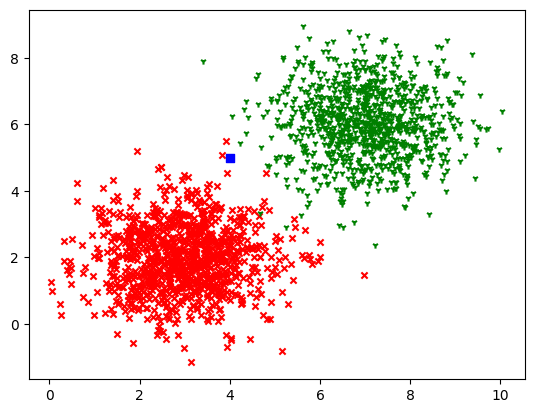

In [81]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

Najlepsze wyniki otrzymałem dla współczynnika uczenia 0.1, liczby epok 3000, batcha równego 20, najgorsze dla współczynnika uczenia 0.001, liczby epok 100, batcha równego 100: